In [1]:
import pandas as pd
import csv

df = pd.read_excel (r'C:\Users\Dennis\Documents\9.Semester\Seminar\Quelle.xlsx')
print (df)

          Date  1 oz Sell  1 oz Buy  1/2 oz Sell  1/2 oz Buy  1/4 oz Sell  \
0   2018-01-03      5.632     5.415        2.869       2.708        1.461   
1   2018-01-04      5.579     5.362        2.842       2.681        1.447   
2   2018-01-05      5.608     5.391        2.857       2.696        1.455   
3   2018-01-08      5.585     5.371        2.845       2.685        1.449   
4   2018-01-09      5.592     5.377        2.849       2.688        1.451   
..         ...        ...       ...          ...         ...          ...   
684 2020-10-23      8.372     8.047        4.265       4.023        2.172   
685 2020-10-26      8.386     8.044        4.272       4.022        2.176   
686 2020-10-27      8.413     8.086        4.286       4.043        2.183   
687 2020-10-28      8.424     8.087        4.292       4.043        2.186   
688 2020-10-30      8.245     7.915        4.200       3.957        2.139   

     1/4 oz Buy  
0         1.354  
1         1.341  
2         1.348  
3  

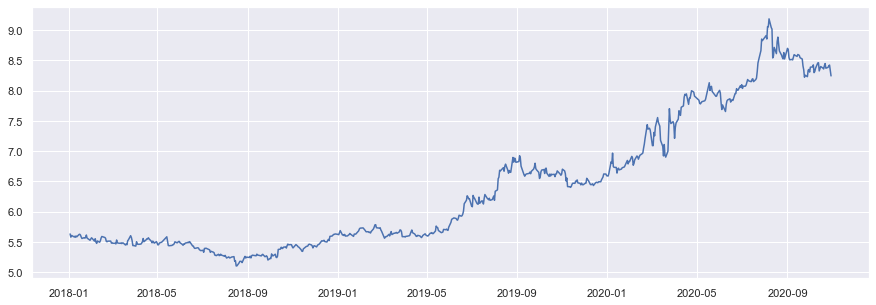

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
plt.figure(figsize = (15, 5))

plt.plot(df["Date"],df["1 oz Sell"])

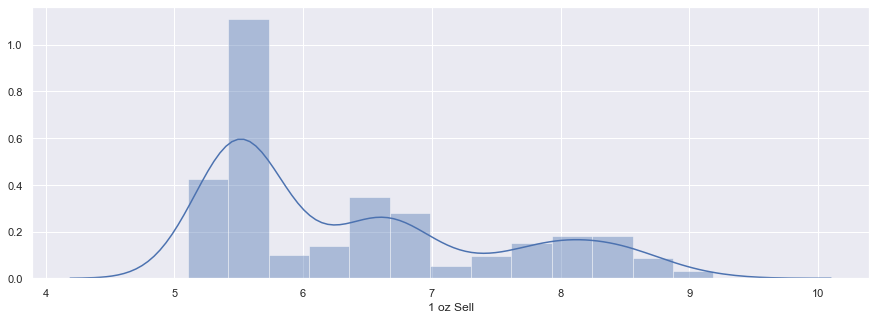

In [3]:
plt.figure(figsize = (15, 5))
sns.distplot(df["1 oz Sell"])
plt.show()


In [4]:
#### Forecast ####
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

for dt in daterange(date(2020,11,1),date(2021,1,1)):
    print(dt.strftime("%Y-%m-%d"))

2020-11-01
2020-11-02
2020-11-03
2020-11-04
2020-11-05
2020-11-06
2020-11-07
2020-11-08
2020-11-09
2020-11-10
2020-11-11
2020-11-12
2020-11-13
2020-11-14
2020-11-15
2020-11-16
2020-11-17
2020-11-18
2020-11-19
2020-11-20
2020-11-21
2020-11-22
2020-11-23
2020-11-24
2020-11-25
2020-11-26
2020-11-27
2020-11-28
2020-11-29
2020-11-30
2020-12-01
2020-12-02
2020-12-03
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12
2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020-12-18
2020-12-19
2020-12-20
2020-12-21
2020-12-22
2020-12-23
2020-12-24
2020-12-25
2020-12-26
2020-12-27
2020-12-28
2020-12-29
2020-12-30
2020-12-31
2021-01-01


In [5]:
selling = df["1 oz Sell"] * 1000
timestamp = df["Date"]

print(selling)

0      5632.0
1      5579.0
2      5608.0
3      5585.0
4      5592.0
        ...  
684    8372.0
685    8386.0
686    8413.0
687    8424.0
688    8245.0
Name: 1 oz Sell, Length: 689, dtype: float64


In [6]:
#train_selling = selling[: int(0.9 * len(selling))]
#test_selling = selling[int(0.9 * len(selling)) :]

train_selling= selling[:int(len(selling))]
test_selling = dt.strftime("%Y-%m-%d")

future_count = len(test_selling)
future_count

10

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.compat.v1.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.compat.v1.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.compat.v1.nn.rnn_cell.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )


In [9]:
num_layers = 1
size_layer = 128
epoch = 500
dropout_rate = 0.6
skip = 10

In [10]:
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.129498
1,0.116524
2,0.123623
3,0.117993
4,0.119706


In [11]:
modelnn = Model(
    learning_rate = 0.001, 
    num_layers = num_layers, 
    size = df_log.shape[1], 
    size_layer = size_layer, 
    output_size = df_log.shape[1], 
    forget_bias = dropout_rate
)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [12]:
%%time

for i in range(epoch):
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss = 0
    for k in range(0, df_log.shape[0] - 1, skip):
        index = min(k + skip, df_log.shape[0] -1)
        batch_x = np.expand_dims(
            df_log.iloc[k : index, :].values, axis = 0
        )
        batch_y = df_log.iloc[k + 1 : index + 1, :].values
        last_state, _, loss = sess.run(
            [modelnn.last_state, modelnn.optimizer, modelnn.cost],
            feed_dict = {
                modelnn.X: batch_x,
                modelnn.Y: batch_y,
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        total_loss += loss
    total_loss /= ((df_log.shape[0] - 1) / skip)
    if (i + 1) % 100 == 0:
        print('epoch:', i + 1, 'avg loss:', total_loss)

epoch: 100 avg loss: 0.0013622135511045493
epoch: 200 avg loss: 0.001100756387110545
epoch: 300 avg loss: 0.0007956579857490883
epoch: 400 avg loss: 0.0009359148135593197
epoch: 500 avg loss: 0.0007440612628056971
Wall time: 3min 31s


In [13]:
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
future_day = future_count

output_predict = np.zeros((df_log.shape[0] + future_day, df_log.shape[1]))
output_predict[0] = df_log.iloc[0]
upper_b = (df_log.shape[0] // skip) * skip
init_value = np.zeros((1, num_layers * 2 * size_layer))
for k in range(0, (df_log.shape[0] // skip) * skip, skip):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(
                df_log.iloc[k : k + skip], axis = 0
            ),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[k + 1 : k + skip + 1] = out_logits

if upper_b < df_log.shape[0]:
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[upper_b:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[upper_b + 1 : df_log.shape[0] + 1] = out_logits
    df_log.loc[df_log.shape[0]] = out_logits[-1]
    future_day = future_day - 1
    
for i in range(future_day):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[-skip:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[df_log.shape[0]] = out_logits[-1]
    df_log.loc[df_log.shape[0]] = out_logits[-1]

In [14]:
df_log = minmax.inverse_transform(output_predict)
lstm_future = df_log[:,0]

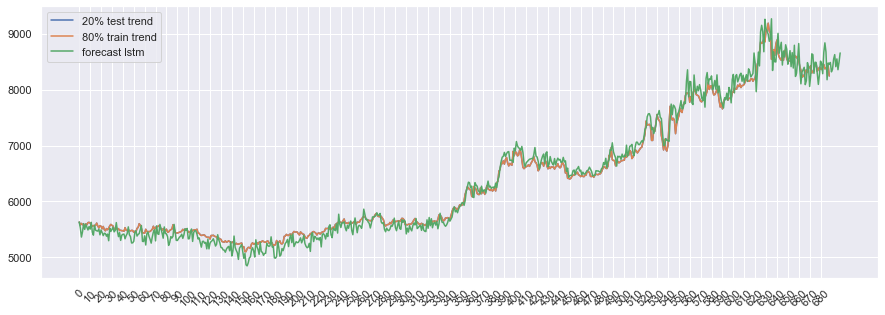

In [15]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = '20% test trend')
ax.plot(train_selling, label = '80% train trend')
ax.plot(lstm_future, label='forecast lstm')
plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()

In [218]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

In [219]:
def calculate_accuracy(real, predict):
    r2 = r2_score(real, predict)
    if r2 < 0:
        r2 = 0

    def change_percentage(val): 
    # minmax, we know that correlation is between -1 and 1
        if val > 0:
            return val
        else:
            return val + 1

    pearson = pearsonr(real, predict)[0]
    spearman = spearmanr(real, predict)[0]
    pearson = change_percentage(pearson)
    spearman = change_percentage(spearman)
    return {
        'r2': r2 * 100,
        'pearson': pearson * 100,
        'spearman': spearman * 100,
    }

In [220]:
def calculate_distance(real, predict):
    mse = ((real - predict) ** 2).mean()
    rmse = np.sqrt(mse)
    return {'mse': mse, 'rmse': rmse}

In [221]:
lstm_cut = lstm_future[: len(train_selling)]

In [222]:
calculate_distance(train_selling, lstm_cut)

{'mse': 8144.522129186768, 'rmse': 90.24700620622697}

In [223]:
calculate_accuracy(train_selling, lstm_cut)

{'r2': 98.90216634546827,
 'pearson': 99.4545286708538,
 'spearman': 98.45166923334054}